# Chipotle Survey Customer Segmentation Analysis
Kyle Pelham, kyleplhm@gmail.com

## Introduction

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from tabulate import tabulate

In [112]:
# Read in chipotle survey data 
df = pd.read_csv('Data\chipotle survey.csv')

# Drop rows and columns that are blank due to survey formatting issues
df = df.iloc[0:357,0:25]

# Preview data with info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   top1                  357 non-null    object 
 1   wom                   357 non-null    float64
 2   sm                    357 non-null    float64
 3   walk                  357 non-null    float64
 4   billboard             357 non-null    float64
 5   patronage             357 non-null    float64
 6   importantconvenience  338 non-null    float64
 7   importantvariety      333 non-null    float64
 8   importantprice        334 non-null    float64
 9   importanthealthy      335 non-null    float64
 10  importanttaste        332 non-null    float64
 11  importantambience     335 non-null    float64
 12  chipotleconvenient    334 non-null    float64
 13  chipotlevariety       333 non-null    float64
 14  chipotleprice         336 non-null    float64
 15  chipotlehealthy       3

In [113]:
# Find number of NA values in each column
df.isna().sum()

top1                     0
wom                      0
sm                       0
walk                     0
billboard                0
patronage                0
importantconvenience    19
importantvariety        24
importantprice          23
importanthealthy        22
importanttaste          25
importantambience       22
chipotleconvenient      23
chipotlevariety         24
chipotleprice           21
chipotlehealthy         27
chipotletaste           23
chipotleambience        24
female                  14
age                     14
income                  14
plan                    14
spending                16
buylocal                17
healthyimportanttome    16
dtype: int64

<AxesSubplot:>

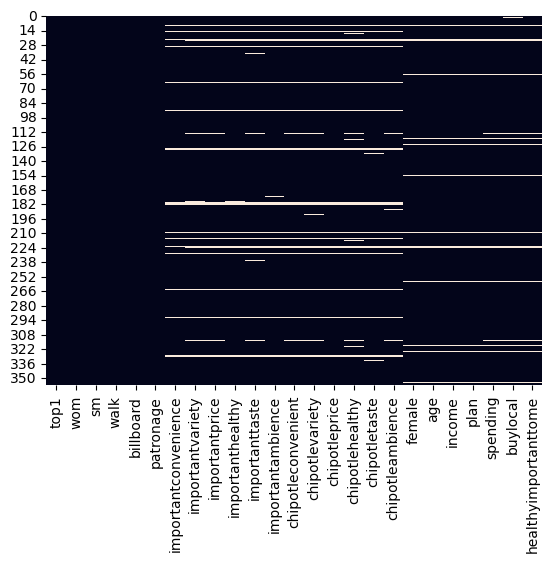

In [114]:
# Create heatmap to visualize NA values in each column
sns.heatmap(df.isna(), cbar=False)

In [115]:
# Drop rows with NA values because k-means clustering cannot handle NA values and imputing them could skew the data
df.dropna(inplace=True)

# shape of cleaned data after dropping NA values
df.shape

(313, 25)

In [116]:
# Print unique values in each column for top1 column
pd.Series(df['top1'].unique()).sort_values()

9               Applebees
7                   Arbys
20            Chick fil a
15             Chick fila
3             Chick-Fil-A
8             Chick-fil-a
37                Chipole
4                Chipolte
1                Chipotle
18          El Pollo Loco
13                 Eppies
0                In-n-out
12    In-n-out Kebob Shop
31           Jason's Deli
33            Jasons Deli
5                     KFC
25             MacDonalds
6               McDonalds
36              Mcdonalds
11                Outback
2                  Panera
19           Panera bread
30              Pizza Hut
14          Pizza express
17              Starbucks
21                Sub Way
28                 Subway
27              Taco Bell
29             The Market
24                Wendy's
22                 Wendys
23                  arbys
32            burger king
26              chickfila
16             chik-fil-a
34              mcdonalds
10                 panera
35           panera bread
dtype: objec

In [117]:
# Replace all values in top1 column that contain variations of restaurants with the correct restaurant name
df['top1'] = df['top1'].str.replace('(?i)chic?k[-_ ]?fil[-_ ]?[aA]', "Chick-fil-A", regex= True)

df['top1'] = df['top1'].str.replace('(?i)chip?o?l?t?l?e', "Chipotle", regex= True)

df['top1'] = df['top1'].str.replace('(?i)ma?cdonald[-_ ]?[sS]', "McDonald's", regex= True)

df['top1'] = df['top1'].str.replace('(?i)panera(?:\s?bread)?', "Panera Bread", regex= True)

df['top1'] = df['top1'].str.replace('(?i)sub[-_ ]?way', "Subway", regex= True)

df['top1'] = df['top1'].str.replace("(?i)arby'?s", "Arby's", regex= True)

df['top1'] = df['top1'].str.replace("(?i)wendy'?s", "Wendy's", regex= True)

df['top1'] = df['top1'].str.replace("(?i)jason'?s\s?deli", "Jason's Deli", regex= True)

# Fix the capitalization of the values in the top1 column except for apostrophes for McDonald's, Arby's and Wendy's
df['top1'] = df['top1'].str.title().str.replace("'S",  "'s", regex= True)


# Print unique values in each column for top1 column to confirm changes
pd.Series(df['top1'].unique()).sort_values()

7               Applebees
6                  Arby's
20            Burger King
3             Chick-Fil-A
1                Chipotle
13          El Pollo Loco
10                 Eppies
0                In-N-Out
9     In-N-Out Kebob Shop
19           Jason's Deli
4                     Kfc
5              Mcdonald's
8                 Outback
2            Panera Bread
11          Pizza Express
18              Pizza Hut
12              Starbucks
14                 Subway
16              Taco Bell
17             The Market
15                Wendy's
dtype: object

In [118]:
# Initialize StandardScaler as scaler
scaler = StandardScaler()

# Fit scaler to numerical columns
df_scaled = scaler.fit_transform(df.drop('top1', axis=1))

# Perform PCA on numerical columns
pca = PCA(n_components=3)

# Fit PCA to numerical columns
pca.fit(df_scaled)

# Transform numerical columns with PCA
pca_transformed = pca.transform(df_scaled)

# Create dataframe with PCA components
pca_df = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2', 'PCA3'])

# View how much each variable contributes to the first three principal components
components = pd.DataFrame(pca.components_, columns = df.drop('top1', axis=1).columns ,index = ['PCA1', 'PCA2', 'PCA3']).transpose()
components


,PCA1,PCA2,PCA3
wom,-0.061706,-0.356166,0.467504
sm,0.025426,0.038712,-0.029315
walk,0.017014,0.363352,-0.432068
billboard,-0.082525,0.145029,-0.050486
patronage,0.105851,-0.019325,0.151955
importantconvenience,-0.229537,-0.064514,0.033785
importantvariety,-0.286483,-0.121365,-0.040794
importantprice,-0.229620,-0.151210,0.066583
importanthealthy,-0.249865,-0.258858,-0.193688
importanttaste,-0.093490,-0.253368,0.038260


c:\Users\kylep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


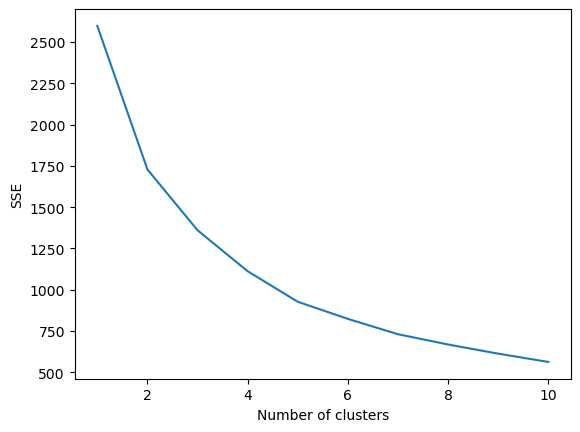

In [119]:
# Use elbow method to determine optimal number of clusters
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [120]:
# Create a k-means clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data without the top1 column
kmeans.fit(pca_df)

# Create a new column in the original dataframe with the cluster labels from PCA and k-means clustering
df['cluster'] = kmeans.labels_

pca_df['cluster'] = kmeans.labels_

# Print the number of observations in each cluster
df['cluster'].value_counts().sort_index()


0    119
1    100
2     94
Name: cluster, dtype: int64

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

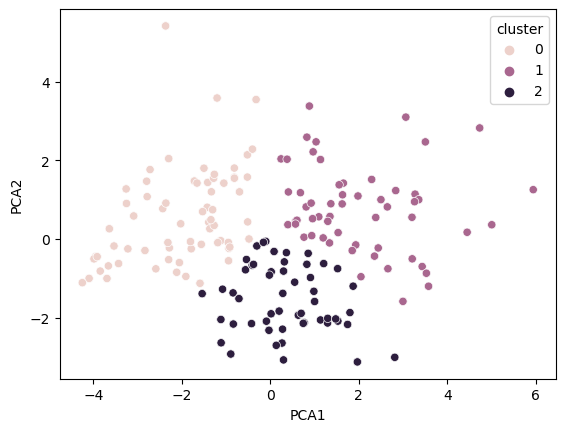

In [121]:
# Plot the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df)

In [135]:

df2 = df.drop('top1', axis=1)

# Train a decision tree classifier on the entire dataset
tree = DecisionTreeClassifier(random_state=42)
tree.fit(df2.drop('cluster', axis=1), df2['cluster'])

# Extract the feature importances from the decision tree
feature_importances = tree.feature_importances_

# Create a list of (feature, importance) tuples
features = df.drop('cluster', axis=1).columns.tolist()
importances = list(zip(features, feature_importances))

# Sort the list by importance in descending order
importances.sort(key=lambda x: x[1], reverse=True)

# Print the feature and importances
print(tabulate(importances, headers=['Feature', 'Importance']))



Feature                 Importance
--------------------  ------------
chipotletaste           0.239348
importantprice          0.12591
female                  0.0821054
chipotlevariety         0.0802732
importantambience       0.07094
top1                    0.0587665
age                     0.0535337
chipotleconvenient      0.0509593
importanttaste          0.042558
importantconvenience    0.0361459
patronage               0.0332495
chipotleambience        0.0275283
income                  0.0191665
chipotleprice           0.017591
spending                0.0128466
buylocal                0.0125321
sm                      0.00963492
importantvariety        0.00913989
billboard               0.00909965
chipotlehealthy         0.00867143
wom                     0
walk                    0
importanthealthy        0
plan                    0


In [136]:
# Extract the top N most important features
N = 10
top_features = [feature for feature, importance in importances[:N]]

#Print the top N most important features
print(f'The top {N} most important features are:')
for feature in top_features:
    print(feature)


The top 10 most important features are:
chipotletaste
importantprice
female
chipotlevariety
importantambience
top1
age
chipotleconvenient
importanttaste
importantconvenience


Optimal decision tree accuracy: 0.9365

Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.89      0.94      0.91        17
           2       0.95      0.86      0.90        21

    accuracy                           0.94        63
   macro avg       0.93      0.93      0.93        63
weighted avg       0.94      0.94      0.94        63




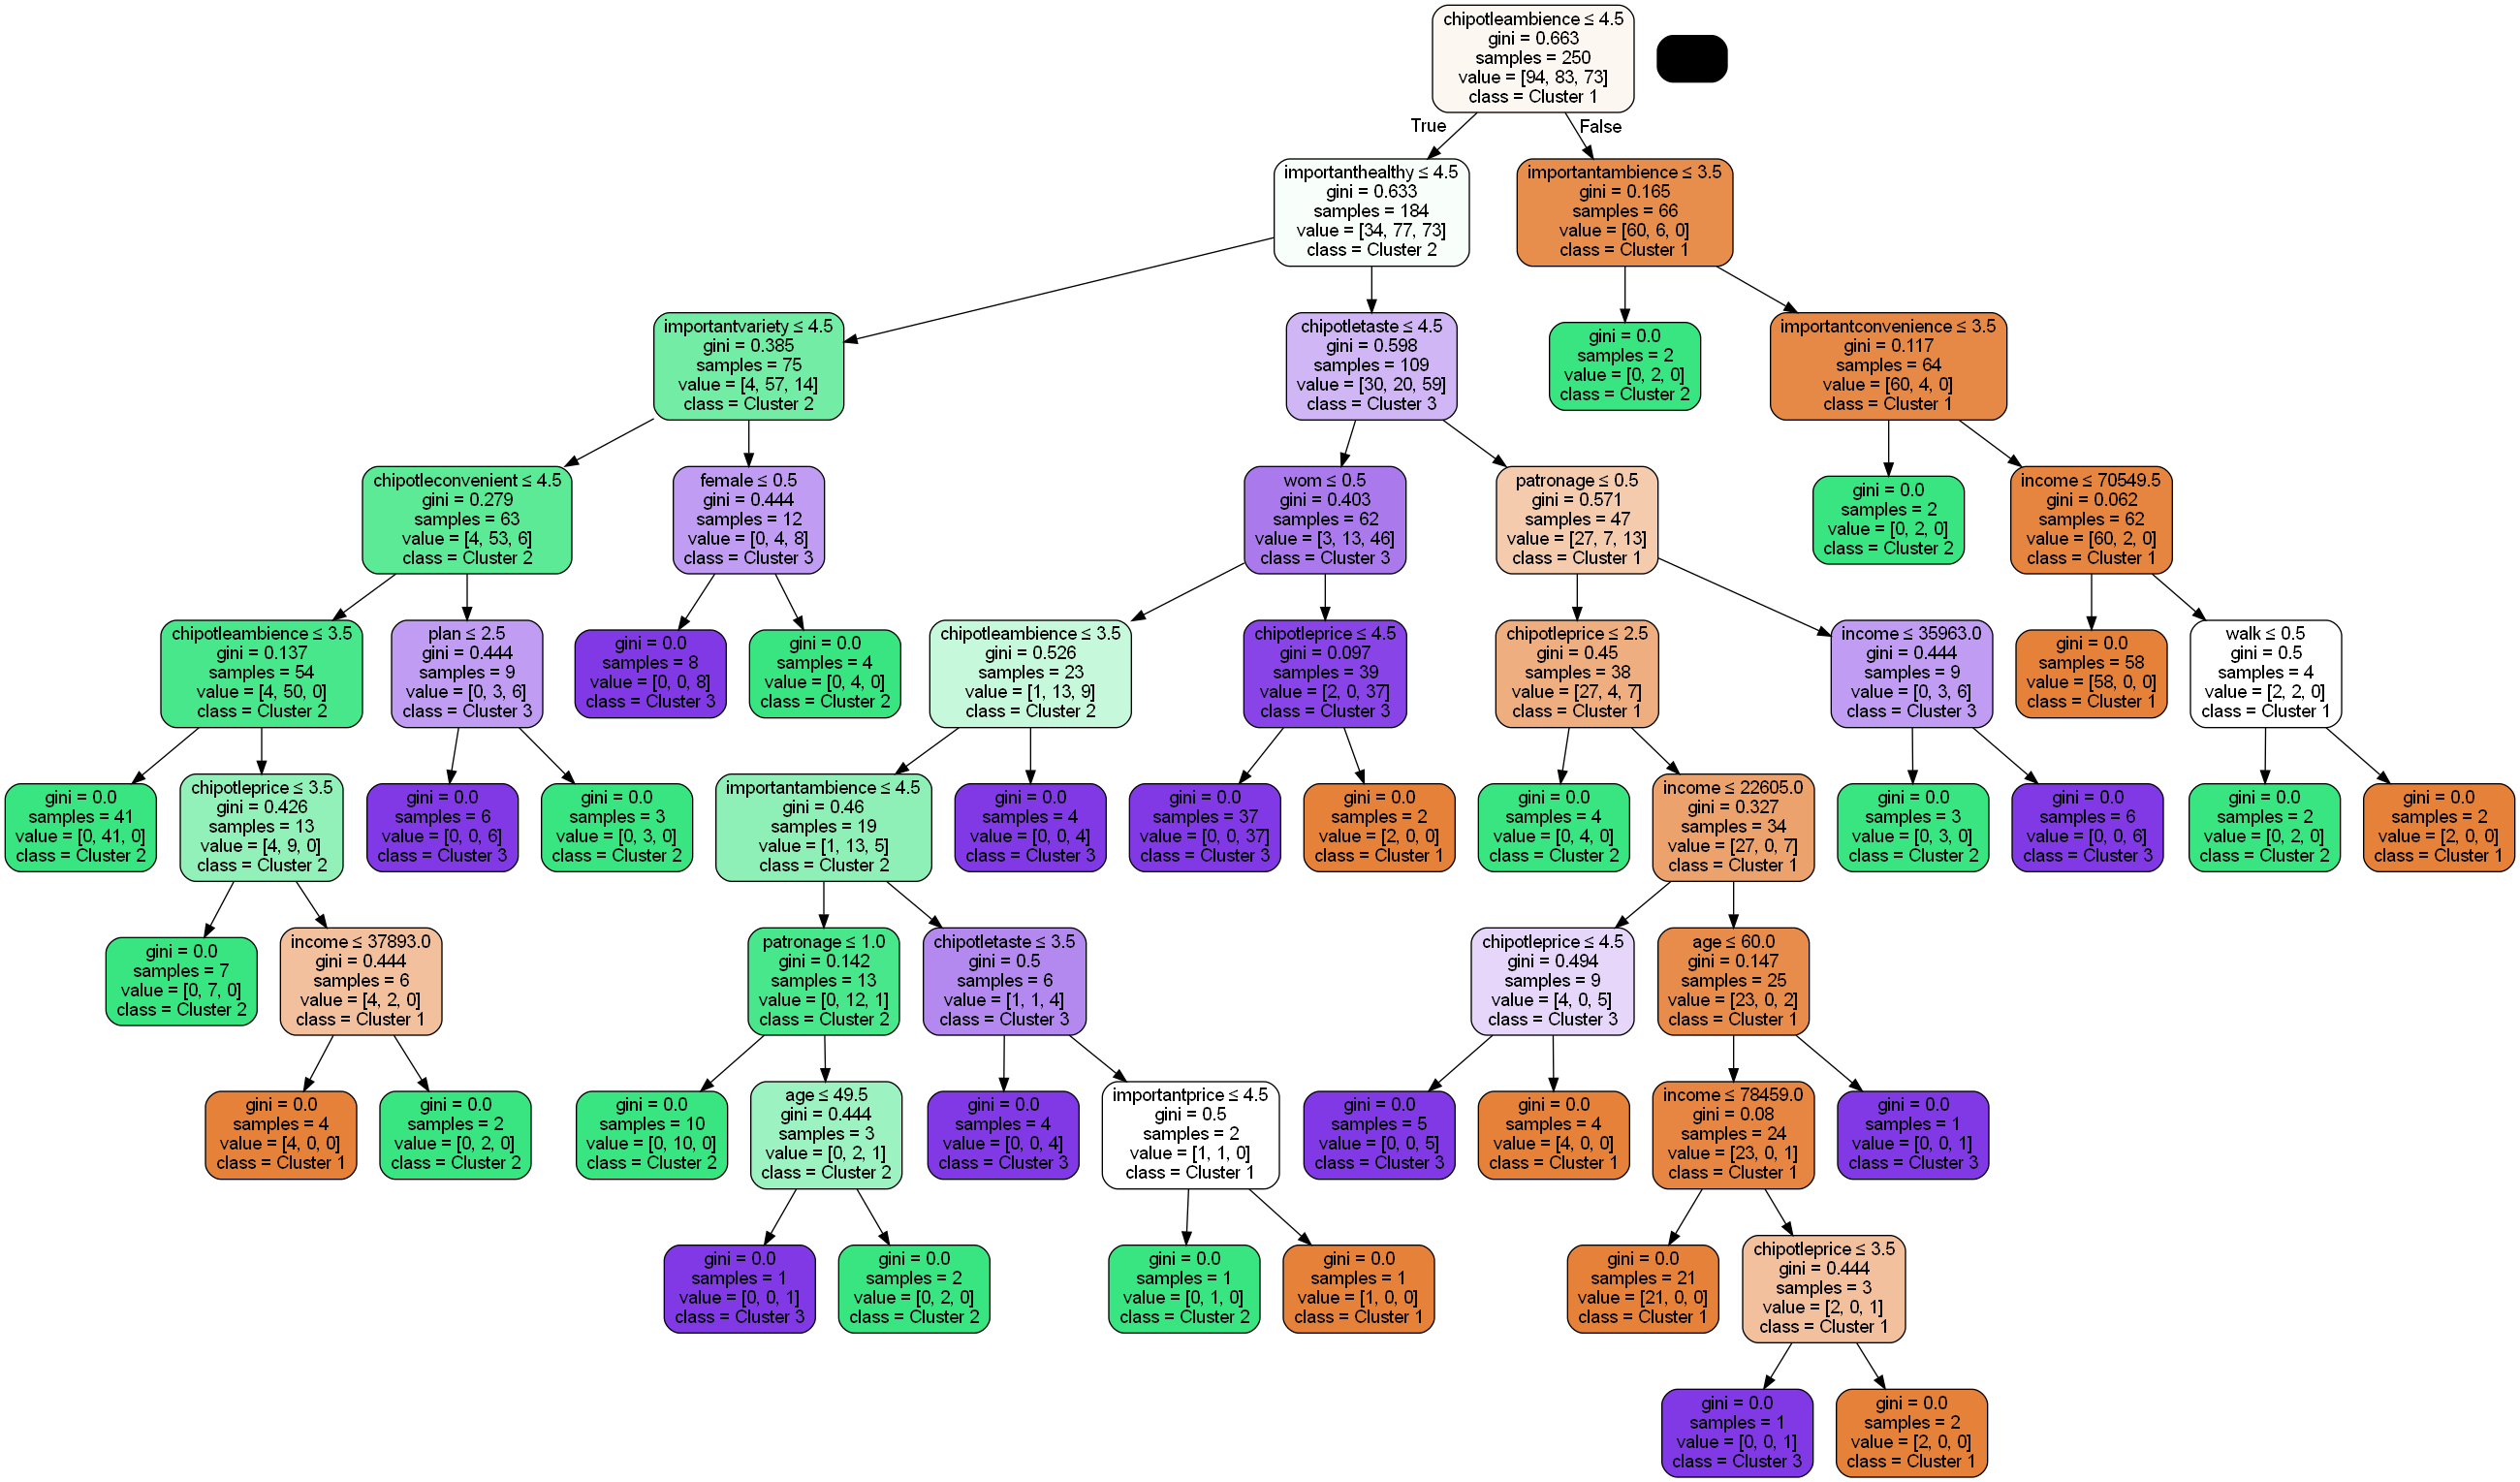

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = df.drop('top1', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('cluster', axis=1), df['cluster'], test_size=0.2, random_state=42)

# Train a decision tree classifier on the training set with Cost-Complexity Pruning
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Evaluate the performance of each decision tree classifier on the testing set
accuracy_scores = []
for tree in trees:
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the optimal decision tree classifier based on the highest accuracy score
optimal_tree_index = accuracy_scores.index(max(accuracy_scores))
optimal_tree = trees[optimal_tree_index]

# Make predictions on the testing set using the optimal decision tree classifier
y_pred = optimal_tree.predict(X_test)

# Evaluate the performance of the optimal decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal decision tree accuracy: {accuracy:.4f}')
print('')

report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)
print('')

# Visualize the optimal decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(optimal_tree, out_file=None, feature_names=X_train.columns.tolist(), class_names=['Cluster 1', 'Cluster 2', 'Cluster 3'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [59]:
# Create a list of features from the original dataframe
features = df.drop(['top1', 'cluster'], axis=1).columns

# Create a list to store the results for each feature
results = []

# Iterate over each feature and compare the statistics across clusters
for feature in features:
    # Create a list to store the data for each cluster
    cluster_data = []
    
    for i in range(3):
        # Extract the data points for the current cluster and feature
        current_cluster_data = df[df['cluster'] == i][feature]
        cluster_data.append(current_cluster_data)
    
    # Conduct an ANOVA to compare the means of the feature across clusters
    f_stat, p_value = f_oneway(*cluster_data)
    
    # Store the results in a list
    result = [feature, f_stat, p_value]
    results.append(result)

# Create a tidy table of the results using tabulate
headers = ['Feature', 'F-statistic', 'p-value']
table = tabulate(results, headers=headers, floatfmt=".4f", tablefmt="grid")

# Print the table
print(table)

KeyError: "['top1'] not found in axis"